<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/CIFAR_10(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Introduction.
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images. This image taken from the CIFAR repository (https://www.cs.toronto.edu/~kriz/cifar.html). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.

###2. Import all required libraries

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

#### 2.1 Import data

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


####2.2 Data Preprocessing

In [ ]:
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

###3. Base Model
Two simple convolutonal layers with 32 filters each and input shape is 32,32,3 and activation function will be relu.

In [ ]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
history1 = model1.fit(x_train, y_train_cat, epochs=20 , validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 13s 3ms/step - loss: 1.7225 - accuracy: 0.3699 - val_loss: 1.2681 - val_accuracy: 0.5431
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2197 - accuracy: 0.5681 - val_loss: 1.1339 - val_accuracy: 0.5964
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0584 - accuracy: 0.6255 - val_loss: 1.1165 - val_accuracy: 0.6109
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9300 - accuracy: 0.6755 - val_loss: 1.0488 - val_accuracy: 0.6360
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8417 - accuracy: 0.7034 - val_loss: 1.0064 - val_accuracy: 0.6607
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7619 - accuracy: 0.7349 - val_loss: 1.0085 - val_accuracy: 0.6633
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6852 - accuracy: 0.7623 - val_loss: 0.9747 - val_accuracy

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

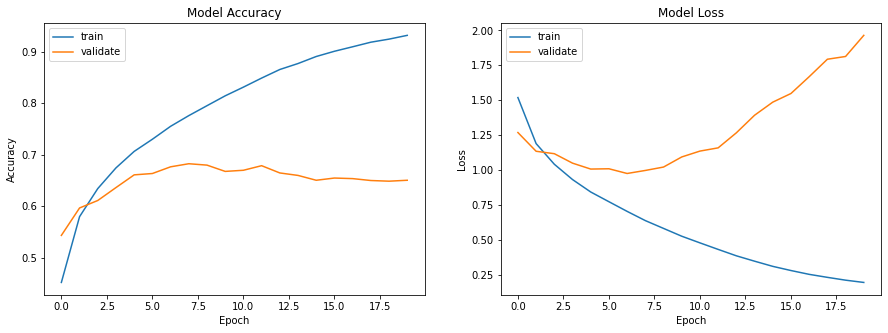

In [ ]:
plotmodelhistory(history1)

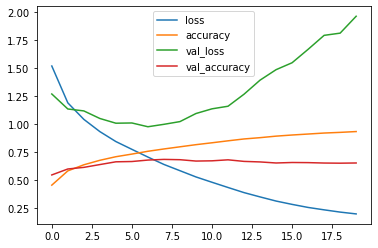

In [ ]:
pd.DataFrame(history1.history).plot()

### 4. Regularized Model


*   Adding Dropout
*   Adding more layers and filters
*   Adding Batch Normalization
*   Image Augmentation



In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
# Implement callback function to stop fitting
# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.90

class myCallback(keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [ ]:
# compile model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=20)
it_train = datagen.flow(x_train, y_train_cat)
steps = int(x_train.shape[0] / 64)

# Fitting the model
history2 = model2.fit_generator(it_train, epochs=200, steps_per_epoch=steps, validation_data=(x_test, y_test_cat), callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
781/781 [==============================] - 16s 19ms/step - loss: 2.3112 - accuracy: 0.2757 - val_loss: 1.4102 - val_accuracy: 0.4857
Epoch 2/200
781/781 [==============================] - 14s 18ms/step - loss: 1.5301 - accuracy: 0.4448 - val_loss: 1.4007 - val_accuracy: 0.5077
Epoch 3/200
781/781 [==============================] - 14s 18ms/step - loss: 1.3257 - accuracy: 0.5208 - val_loss: 1.2258 - val_accuracy: 0.5793
Epoch 4/200
781/781 [==============================] - 14s 18ms/step - loss: 1.2203 - accuracy: 0.5686 - val_loss: 1.1331 - val_accuracy: 0.6113
Epoch 5/200
781/781 [==============================] - 14s 18ms/step - loss: 1.1239 - accuracy: 0.6022 - val_loss: 1.0544 - val_accuracy: 0.6346
Epoch 6/200
781/781 [==============================] - 14s 18ms/step - loss: 1.0498 - accuracy: 0.6314 - val_loss: 1.0206 - val_accuracy: 0.6465
Epoch 7/200
781/781 [==============================] - 14s 18ms/step - loss: 1.0152 - accuracy: 0.6419 - val_loss: 0.9718 - val_ac

In [ ]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}%'.format(evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8789
Test Accuracy: 87.88999915122986%


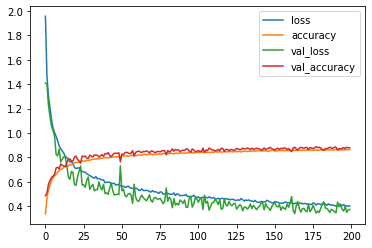

In [ ]:
pd.DataFrame(history2.history).plot()

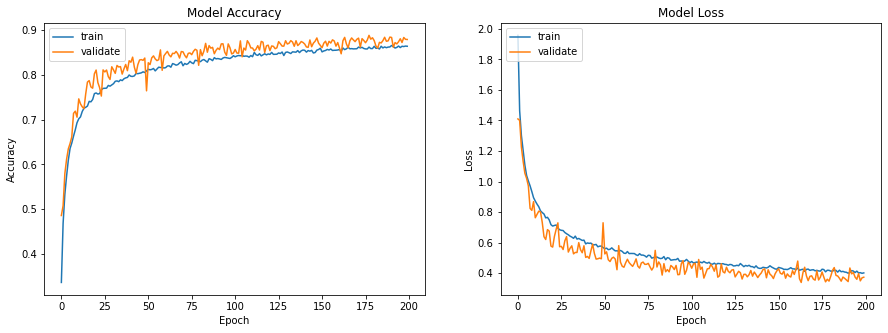

In [ ]:
plotmodelhistory(history2)

In [ ]:
# make prediction.
pred = model2.predict(x_test)

In [ ]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat, axis=1)

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model2.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key], labels[Y_true[number]]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


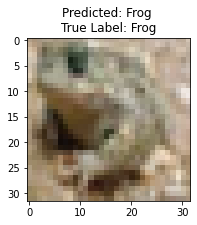

In [ ]:
show_test(301)